Matplotlib is building the font cache; this may take a moment.


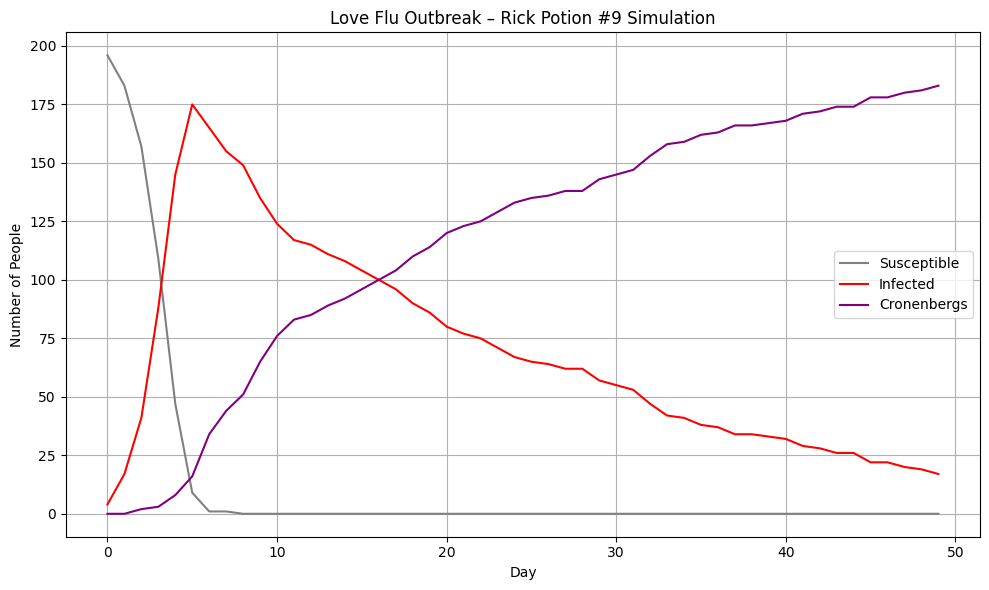

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parametry
N = 200                 # Celkem lidí
initial_infected = 1    # Jessica
contacts = 10   # S kolika lidmi každý člověk komunikuje
infection_prob = 0.2    # Šance přenosu na kontakt
mutation_prob = 0.05    # Z šance nakaženého se každý den stane Cronenberg
days = 50               # Délka simulace

# Stavy
SUSCEPTIBLE = 0
INFECTED = 1
CRONENBERG = 2

# Inicializovat populaci
people = [SUSCEPTIBLE] * N
people[0] = INFECTED  # Jessica

# Sběr dat
history_s = []
history_i = []
history_c = []

for day in range(days):
    new_people = people.copy()

    for i in range(N):
        if people[i] == INFECTED:
            # Pokus se nakazit ostatní
            for _ in range(contacts):
                target = random.randint(0, N-1)
                if people[target] == SUSCEPTIBLE and random.random() < infection_prob:
                    new_people[target] = INFECTED
            # Šance na mutaci
            if random.random() < mutation_prob:
                new_people[i] = CRONENBERG

    people = new_people

    # Počet stavů
    s = people.count(SUSCEPTIBLE)
    i = people.count(INFECTED)
    c = people.count(CRONENBERG)

    history_s.append(s)
    history_i.append(i)
    history_c.append(c)

# Graf
plt.figure(figsize=(10,6))
plt.plot(history_s, label="Susceptible", color="gray")
plt.plot(history_i, label="Infected", color="red")
plt.plot(history_c, label="Cronenbergs", color="purple")
plt.title("Love Flu Outbreak – Rick Potion #9 Simulation")
plt.xlabel("Day")
plt.ylabel("Number of People")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
